In [2]:
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython import display
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Figure = plt.figure()
 
# creating a plot
lines_plotted = plt.plot([])    
 
# putting limits on x axis since
# it is a trigonometry function
# (0,2∏)
line_plotted = lines_plotted[0]
 
plt.xlim(0,3) 
 
# putting limits on y since it is a
# cosine function
plt.ylim(-1.1,0.3)   
 
# initialising x from 0 to 2∏
x = np.linspace(3,0,250)
 
#initially
y = 0

  
# function takes frame as an input
def SqWlFunction(frame):
 
    # setting y according to frame
    # number and + x. It's logic
    ty = []
    #[ty.append(-1+0.005*frame if ix < np.pi/2. else 0.) for ix in x]
    [ty.append(-0.005*frame*np.exp(-ix*ix)) for ix in x]
    y = np.array(ty)
 
    # line is set with new values of x and y
    line_plotted.set_data((x, y))
    
anim_created = FuncAnimation(Figure, SqWlFunction, frames=200, interval=25)
video = anim_created.to_html5_video()
html = display.HTML(video)
display.display(html)
 
# good practice to close the plt object.
plt.close()

/tmp/ipykernel_51492/3246167234.py:33: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  num = Rfunc(ra)*yv(l, pmom*ra) - derivative(yvfn, ra, dx=0.00001)
/tmp/ipykernel_51492/3246167234.py:34: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  den = Rfunc(ra)*jv(l, pmom*ra) - derivative(jvfn, ra, dx=0.00001)


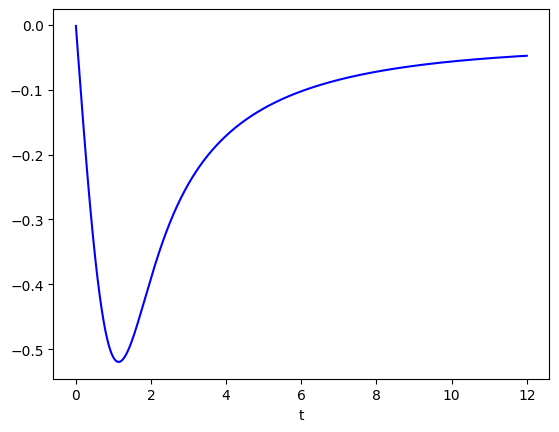

In [3]:
def Vpot(r,V0):
    return -V0*np.exp(-r*r)

def odeeqns(y, r, Mr, l, El, V0):
    theta, omega = y
    return [omega, -2.*Mr*(El-Vpot(r,V0))*theta]

y0=[0.,1.]
r=np.linspace(0.,12.,5000)
rlen = len(r)
Mr=0.95
l=0
El=1./800.
V0=1.233700550136169827

usol = odeint(odeeqns, y0, r, args=(Mr, l, El, V0))

from scipy.interpolate import CubicSpline as CS
ufunc=CS(r, usol[:,0])
Rfunc=CS(r[1:], np.log(usol[1:,0]/r[1:])).derivative()

Rvals = Rfunc(r[1:])
ra = 9.
pmom = np.lib.scimath.sqrt(2*Mr*El)

def jvfn(x):
    return jv(l, pmom*x)
def yvfn(x):
    return yv(l, pmom*x)

from scipy.special import jv, yv 
from scipy.misc import derivative
num = Rfunc(ra)*yv(l, pmom*ra) - derivative(yvfn, ra, dx=0.00001)
den = Rfunc(ra)*jv(l, pmom*ra) - derivative(jvfn, ra, dx=0.00001)
cotdel = num/den
ktilde=np.real(np.power(pmom,2*l+1)*cotdel)
rbsc=np.real(1j*np.power(pmom,2*l+1))
vbsc=np.real(1j*np.power(-pmom,2*l+1))

import matplotlib.pyplot as plt
plt.plot(r[1:], Rvals, 'b')
#plt.legend(loc='best')
plt.xlabel('t')
#plt.grid()
plt.show()

In [48]:
from scipy.special import spherical_jn as jn
from scipy.special import spherical_yn as yn
from scipy.misc import derivative
from scipy.interpolate import CubicSpline as CS
import matplotlib.pyplot as plt
import numpy as np

def Vpot(r,V0):
    return -V0/(1+np.exp((r-1)/0.05))

def odeeqns(y, r, Mr, l, El, V0):
    theta, omega = y
    return [omega, -2.*Mr*(El-Vpot(r,V0))*theta]

y0=[0.,1.]
r=np.linspace(0.,12.,5000)
rlen = len(r)
Mr=0.95
l=0
V0=np.pi**2/8

cotdel = []
ktilde = []
parray = []
narray = []
darray = []
rbsc = []
vbsc = []
Elvls = []
for iEdel in np.linspace(-40.,0.,num=200):
    El=iEdel/800.+0.001
    Elvls.append(El)
    usol = odeint(odeeqns, y0, r, args=(Mr, l, El, V0))

    ufunc=CS(r, -usol[:,0])
    Rfunc=CS(r[1:], np.log(usol[1:,0]/r[1:])).derivative()

    Rvals = Rfunc(r[1:])
    ra = 8.
    pmom = np.lib.scimath.sqrt(2*Mr*El)
    def jnfn(x):
        return jn(l, pmom*x)
    def ynfn(x):
        return yn(l, pmom*x)

    num = yn(l, pmom*ra)*Rfunc(ra) - derivative(ynfn, ra, dx=0.00001)
    den = jn(l, pmom*ra)*Rfunc(ra) - derivative(jnfn, ra, dx=0.00001)
    parray.append(pmom)
    narray.append(num)
    darray.append(den)
    cotdel.append(num/den)
    ktilde.append(np.real(np.power(pmom,2*l+1)*num/den))
    rbsc.append(np.real(1j*np.power(pmom,2*l+1)))
    vbsc.append(np.real(1j*np.power(-pmom,2*l+1)))

parray = np.array(parray)
narray = np.array(narray)
darray = np.array(darray)
cotdel = np.array(cotdel)
ktilde = np.array(ktilde)
rbsc = np.array(rbsc)
vbsc = np.array(vbsc)
Elvls = np.array(Elvls)

rpsin = CS(Elvls, ktilde-rbsc)
vpsin = CS(Elvls, ktilde-vbsc)
polE = -10. 
polp = -10.
for sols in rpsin.roots():
    if sols<0:
        if sols>polE:
            polE = sols
            polp = np.real(1j*np.lib.scimath.sqrt(2*Mr*polE))
for sols in vpsin.roots():
    if sols<0:
        if sols>polE:
            polE = sols
            polp = np.real(-1j*np.lib.scimath.sqrt(2*Mr*polE))


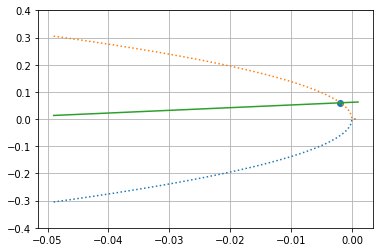

In [45]:
plt.ylim([-0.4,0.4])
plt.plot(Elvls, rbsc,linestyle=":")
plt.plot(Elvls, vbsc,linestyle=":")
plt.plot(Elvls, ktilde)
plt.scatter(polE,polp)
plt.grid()
plt.show()

In [53]:
from scipy.special import spherical_jn as jn
from scipy.special import spherical_yn as yn
from scipy.misc import derivative
from scipy.interpolate import CubicSpline as CS
import matplotlib.pyplot as plt
import numpy as np

def Vpot(r,V0):
    return -V0*np.exp(-r*r)

def odeeqns(y, r, Mr, l, El, V0):
    theta, omega = y
    return [omega, -2.*Mr*(El-Vpot(r,V0))*theta]

y0=[0.,1.]
r=np.linspace(0.,12.,5000)
rlen = len(r)
Mr=0.95
l=0
V0=np.pi**2/8

cotdel = []
ktilde = []
parray = []
narray = []
darray = []
rbsc = []
vbsc = []
Elvls = []
for iEdel in np.linspace(-40.,0.,num=200):
    El=iEdel/800.+0.001
    Elvls.append(El)
    usol = odeint(odeeqns, y0, r, args=(Mr, l, El, V0))

    ufunc=CS(r, -usol[:,0])
    Rfunc=CS(r[1:], np.log(usol[1:,0]/r[1:])).derivative()

    Rvals = Rfunc(r[1:])
    ra = 8.
    pmom = np.lib.scimath.sqrt(2*Mr*El)
    def jnfn(x):
        return jn(l, pmom*x)
    def ynfn(x):
        return yn(l, pmom*x)

    num = yn(l, pmom*ra)*Rfunc(ra) - derivative(ynfn, ra, dx=0.00001)
    den = jn(l, pmom*ra)*Rfunc(ra) - derivative(jnfn, ra, dx=0.00001)
    parray.append(pmom)
    narray.append(num)
    darray.append(den)
    cotdel.append(num/den)
    ktilde.append(np.real(np.power(pmom,2*l+1)*num/den))
    rbsc.append(np.real(1j*np.power(pmom,2*l+1)))
    vbsc.append(np.real(1j*np.power(-pmom,2*l+1)))

parray = np.array(parray)
narray = np.array(narray)
darray = np.array(darray)
cotdel = np.array(cotdel)
ktilde = np.array(ktilde)
rbsc = np.array(rbsc)
vbsc = np.array(vbsc)
Elvls = np.array(Elvls)

rpsin = CS(Elvls, ktilde-rbsc)
vpsin = CS(Elvls, ktilde-vbsc)
polE = -10. 
polp = -10.
for sols in rpsin.roots():
    if sols<0:
        if sols>polE:
            polE = sols
            polp = np.real(1j*np.lib.scimath.sqrt(2*Mr*polE))
for sols in vpsin.roots():
    if sols<0:
        if sols>polE:
            polE = sols
            polp = np.real(-1j*np.lib.scimath.sqrt(2*Mr*polE))

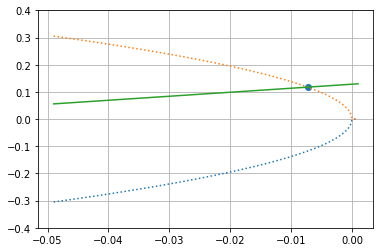

In [52]:
plt.ylim([-0.4,0.4])
plt.plot(Elvls, rbsc,linestyle=":")
plt.plot(Elvls, vbsc,linestyle=":")
plt.plot(Elvls, ktilde)
plt.scatter(polE,polp)
plt.grid()
plt.show()

In [2]:
from scipy.special import spherical_jn as jn
from scipy.special import spherical_yn as yn
from scipy.misc import derivative
from scipy.interpolate import CubicSpline as CS
import matplotlib.pyplot as plt
import numpy as np

def Vpot(r,V0):
    return -V0*np.exp(-r*r)

def odeeqns(y, r, Mr, l, El, V0):
    theta, omega = y
    return [omega, -2.*Mr*(El-Vpot(r,V0))*theta]

y0=[0.,1.]
r=np.linspace(0.,12.,100)
rlen = len(r)
Mr=0.95
l=0
V0=np.pi**2/8

rbsc = []
vbsc = []
Elvls = []
for iEdel in np.linspace(-40.,0.,num=200):
    El=iEdel/800.+0.001
    Elvls.append(El)
    pmom = np.lib.scimath.sqrt(2*Mr*El)
    rbsc.append(np.real(1j*np.power(pmom,2*l+1)))
    vbsc.append(np.real(1j*np.power(-pmom,2*l+1)))

rbsc = np.array(rbsc)
vbsc = np.array(vbsc)
Elvls = np.array(Elvls)

def kmat(V0):
    ktilde = []
    for iEdel in np.linspace(-40.,0.,num=200):
        El=iEdel/800.+0.001
        usol = odeint(odeeqns, y0, r, args=(Mr, l, El, V0))

        ufunc=CS(r, -usol[:,0])
        Rfunc=CS(r[1:], np.log(usol[1:,0]/r[1:])).derivative()

        Rvals = Rfunc(r[1:])
        ra = 8.
        pmom = np.lib.scimath.sqrt(2*Mr*El)
        def jnfn(x):
            return jn(l, pmom*x)
        def ynfn(x):
            return yn(l, pmom*x)

        num = yn(l, pmom*ra)*Rfunc(ra) - derivative(ynfn, ra, dx=0.00001)
        den = jn(l, pmom*ra)*Rfunc(ra) - derivative(jnfn, ra, dx=0.00001)
        ktilde.append(np.real(np.power(pmom,2*l+1)*num/den))

    return np.array(ktilde)
          
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython import display
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import sys 


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 6))
plt.subplots_adjust(wspace=0.2,hspace=0.4)


ax1.set_ylim(-2.0,0.3)
ax1.set_xlim(0, 12.)
ax1.set_xlabel("r",family='sans-serif',fontsize=24,fontstyle='italic')
ax1.set_ylabel("V",family='sans-serif',fontsize=24,fontstyle='italic')
ax1.tick_params(axis="x", labelsize=15)
ax1.tick_params(axis="y", labelsize=15)
#ax1.set_xticks(np.array([xt for xt in np.arange(float(xaxpars[0]),float(xaxpars[2]),float(xaxpars[1]))]))
#ax1.set_yticks(np.array([yt for yt in np.arange(float(yaxpars[0]),float(yaxpars[2]),float(yaxpars[1]))]))
ax1.axhline(y=0.0, color='0.0', linestyle='-',alpha=0.5)
line1 = ax1.plot([])   

ax2.set_ylim([-0.4,0.4])
ax2.set_xlim([-0.05,0.001])
ax2.set_xlabel(r"$p^2$",family='sans-serif',fontsize=24,fontstyle='italic')
ax2.set_ylabel(r"$p~cot\delta_0$",family='sans-serif',fontsize=24,fontstyle='italic')
ax2.tick_params(axis="x", labelsize=15)
ax2.tick_params(axis="y", labelsize=15)
ax2.axhline(y=0.0, color='0.0', linestyle='-',alpha=0.5)
ax2.axvline(x=0.0, color='0.0', linestyle='-',alpha=0.5)
ax2.plot(Elvls, rbsc, linestyle=":")
ax2.plot(Elvls, vbsc, linestyle=":")
line2 = ax2.plot([])    
line = [line1, line2]

def AnimFunction(frame):
    stepval=0.002
    Vvals = np.array([Vpot(ix,V0+stepval*frame) for ix in r])
    line[0][0].set_data((r, Vvals))
    line[1][0].set_data((Elvls, kmat(V0+stepval*frame)))
    return line
    
anim_created = FuncAnimation(fig, AnimFunction, frames=150, interval=20,repeat=False)
video = anim_created.to_html5_video()
html = display.HTML(video)
display.display(html)

fig.tight_layout()

# good practice to close the plt object.
plt.close()

/tmp/ipykernel_7352/1054447973.py:53: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  num = yn(l, pmom*ra)*Rfunc(ra) - derivative(ynfn, ra, dx=0.00001)
/tmp/ipykernel_7352/1054447973.py:54: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  den = jn(l, pmom*ra)*Rfunc(ra) - derivative(jnfn, ra, dx=0.00001)


In [8]:
from scipy.special import spherical_jn as jn
from scipy.special import spherical_yn as yn
from scipy.misc import derivative
from scipy.interpolate import CubicSpline as CS
import matplotlib.pyplot as plt
import numpy as np

def Vpot(r,V0):
    return -V0*np.exp(-r*r)

def rpos(Eval, V0):
    return np.sqrt(np.log(-V0/Eval))

def odeeqns(y, r, Mr, l, El, V0):
    theta, omega = y
    return [omega, -2.*Mr*(El-Vpot(r,V0))*theta]

y0=[0.,1.]
r=np.linspace(0.,12.,1500)
rlen = len(r)
Mr=0.95
l=0
V0=np.pi**2/8

rbsc = []
vbsc = []
Elvls = []
for iEdel in np.linspace(-40.,0.,num=200):
    El=iEdel/800.+0.001
    Elvls.append(El)
    pmom = np.lib.scimath.sqrt(2*Mr*El)
    rbsc.append(np.real(1j*np.power(pmom,2*l+1)))
    vbsc.append(np.real(1j*np.power(-pmom,2*l+1)))

rbsc = np.array(rbsc)
vbsc = np.array(vbsc)
Elvls = np.array(Elvls)

def kmat(V0):
    ktilde = []
    for iEdel in np.linspace(-40.,0.,num=200):
        El=iEdel/800.+0.001
        usol = odeint(odeeqns, y0, r, args=(Mr, l, El, V0))

        ufunc=CS(r, -usol[:,0])
        Rfunc=CS(r[1:], np.log(usol[1:,0]/r[1:])).derivative()

        Rvals = Rfunc(r[1:])
        ra = 8.
        pmom = np.lib.scimath.sqrt(2*Mr*El)
        def jnfn(x):
            return jn(l, pmom*x)
        def ynfn(x):
            return yn(l, pmom*x)

        num = yn(l, pmom*ra)*Rfunc(ra) - derivative(ynfn, ra, dx=0.00001)
        den = jn(l, pmom*ra)*Rfunc(ra) - derivative(jnfn, ra, dx=0.00001)
        ktilde.append(np.real(np.power(pmom,2*l+1)*num/den))
               
    rpsin = CS(Elvls, np.array(ktilde)-rbsc)
    vpsin = CS(Elvls, np.array(ktilde)-vbsc)
    polE = -10. 
    polp = -10.
    for sols in rpsin.roots():
        if sols<0:
            if sols>polE:
                polE = sols
                polp = np.real(1j*np.lib.scimath.sqrt(2*Mr*polE))
    for sols in vpsin.roots():
        if sols<0:
            if sols>polE:
                polE = sols
                polp = np.real(-1j*np.lib.scimath.sqrt(2*Mr*polE))

    return ktilde, polp, polE
          
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython import display
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import sys 


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 6))
plt.subplots_adjust(wspace=0.2,hspace=0.4)
fig.suptitle('Pole trajectory in a potential '+r"$V=-V_0~e^{-r^2/M}$", fontsize=21)


def AnimFunction(frame):
    stepval=0.002
    Vvals = np.array([Vpot(ix,V0+stepval*frame) for ix in r])
    Kvals, poE, pop = kmat(V0+stepval*frame)

    ax1.clear()
    ax1.set_ylim(-2.0,0.3)
    ax1.set_xlim(0, 4.)
    ax1.set_xlabel("r",family='sans-serif',fontsize=24,fontstyle='italic')
    ax1.set_ylabel("V",family='sans-serif',fontsize=24,fontstyle='italic')
    ax1.tick_params(axis="x", labelsize=15)
    ax1.tick_params(axis="y", labelsize=15)
    if poE<-0.01:
        ax1.hlines(poE, 0., rpos(poE,V0+stepval*frame), colors="black", linestyle="-",)  
    ax1.axhline(y=0.0, color='0.0', linestyle='-',alpha=0.5)
    ax1.plot(r, Vvals, lw=2.5, color="blue")

    ax2.clear()
    ax2.set_ylim([-0.4,0.4])
    ax2.set_xlim([-0.05,0.001])
    ax2.set_xlabel(r"$p^2$",family='sans-serif',fontsize=24,fontstyle='italic')
    ax2.set_ylabel(r"$p~cot\delta_0$",family='sans-serif',fontsize=24,fontstyle='italic')
    ax2.tick_params(axis="x", labelsize=15)
    ax2.tick_params(axis="y", labelsize=15)
    ax2.axhline(y=0.0, color='0.0', linestyle='-',alpha=0.5)
    ax2.axvline(x=0.0, color='0.0', linestyle='-',alpha=0.5)
    ax2.plot(Elvls, rbsc, color="orange", linestyle="dashed", lw=2.5)
    ax2.plot(Elvls, vbsc, color="cyan", linestyle="dashed", lw=2.5)
    ax2.plot(Elvls, Kvals, lw=2.5, color="blue")
    ax2.scatter(np.array([pop]), np.array([poE]), c="magenta", s=100, alpha=0.8) 
    
anim_created = FuncAnimation(fig, AnimFunction, frames=150, interval=50, save_count=150)
video = anim_created.to_html5_video()
html = display.HTML(video)
display.display(html)

fig.tight_layout()

anim_created.save('vbs_to_bs.mp4')
plt.close()

/tmp/ipykernel_1777/1991930611.py:12: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.log(-V0/Eval))
/home/pmadanag/.local/lib/python3.10/site-packages/matplotlib/axes/_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/tmp/ipykernel_1777/1991930611.py:12: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.log(-V0/Eval))
/home/pmadanag/.local/lib/python3.10/site-packages/matplotlib/axes/_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/tmp/ipykernel_1777/1991930611.py:12: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.log(-V0/Eval))
/home/pmadanag/.local/lib/python3.10/site-packages/matplotlib/axes/_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/tmp/ipykernel_1777/1991930611.py:12: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.log(-V0/Eval))
/home/pmadanag/.

/tmp/ipykernel_1777/1991930611.py:12: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.log(-V0/Eval))
/home/pmadanag/.local/lib/python3.10/site-packages/matplotlib/axes/_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/tmp/ipykernel_1777/1991930611.py:12: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.log(-V0/Eval))
/home/pmadanag/.local/lib/python3.10/site-packages/matplotlib/axes/_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/tmp/ipykernel_1777/1991930611.py:12: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.log(-V0/Eval))
/home/pmadanag/.local/lib/python3.10/site-packages/matplotlib/axes/_base.py:2475: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)
/tmp/ipykernel_1777/1991930611.py:12: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.log(-V0/Eval))
/home/pmadanag/.

In [207]:
from scipy.special import spherical_jn as jn
from scipy.special import spherical_yn as yn
from scipy.misc import derivative
from scipy.interpolate import CubicSpline as CS
import matplotlib.pyplot as plt
import numpy as np
from celluloid import Camera

def Vpot(r,V0):
    return -V0*np.exp(-r*r)

def odeeqns(y, r, Mr, l, El, V0):
    theta, omega = y
    return [omega, -2.*Mr*(El-Vpot(r,V0))*theta]

y0=[0.,1.]
r=np.linspace(0.,12.,100)
rlen = len(r)
Mr=0.95
l=0
V0=np.pi**2/8

rbsc = []
vbsc = []
Elvls = []
for iEdel in np.linspace(-40.,0.,num=200):
    El=iEdel/800.+0.001
    Elvls.append(El)
    pmom = np.lib.scimath.sqrt(2*Mr*El)
    rbsc.append(np.real(1j*np.power(pmom,2*l+1)))
    vbsc.append(np.real(1j*np.power(-pmom,2*l+1)))

rbsc = np.array(rbsc)
vbsc = np.array(vbsc)
Elvls = np.array(Elvls)

def kmat(V0):
    ktilde = []
    for iEdel in np.linspace(-40.,0.,num=200):
        El=iEdel/800.+0.001
        usol = odeint(odeeqns, y0, r, args=(Mr, l, El, V0))

        ufunc=CS(r, -usol[:,0])
        Rfunc=CS(r[1:], np.log(usol[1:,0]/r[1:])).derivative()

        Rvals = Rfunc(r[1:])
        ra = 8.
        pmom = np.lib.scimath.sqrt(2*Mr*El)
        def jnfn(x):
            return jn(l, pmom*x)
        def ynfn(x):
            return yn(l, pmom*x)

        num = yn(l, pmom*ra)*Rfunc(ra) - derivative(ynfn, ra, dx=0.00001)
        den = jn(l, pmom*ra)*Rfunc(ra) - derivative(jnfn, ra, dx=0.00001)
        ktilde.append(np.real(np.power(pmom,2*l+1)*num/den))
               
    rpsin = CS(Elvls, np.array(ktilde)-rbsc)
    vpsin = CS(Elvls, np.array(ktilde)-vbsc)
    polE = -10. 
    polp = -10.
    for sols in rpsin.roots():
        if sols<0:
            if sols>polE:
                polE = sols
                polp = np.real(1j*np.lib.scimath.sqrt(2*Mr*polE))
    for sols in vpsin.roots():
        if sols<0:
            if sols>polE:
                polE = sols
                polp = np.real(-1j*np.lib.scimath.sqrt(2*Mr*polE))

    return ktilde, polp, polE
          
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython import display
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import sys 


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 6))
camera = Camera(fig)

def AnimFunction(frame):
    plt.subplots_adjust(wspace=0.2,hspace=0.4)
    stepval=0.002

    ax1.set_ylim(-2.0,0.3)
    ax1.set_xlim(0, 12.)
    ax1.set_xlabel("r",family='sans-serif',fontsize=24,fontstyle='italic')
    ax1.set_ylabel("V",family='sans-serif',fontsize=24,fontstyle='italic')
    ax1.tick_params(axis="x", labelsize=15)
    ax1.tick_params(axis="y", labelsize=15)
    ax1.axhline(y=0.0, color='0.0', linestyle='-',alpha=0.5)
    Vvals = np.array([Vpot(ix,V0+stepval*frame) for ix in r])
    ax1.plot(r, Vvals)
      
    ax2.set_ylim([-0.4,0.4])
    ax2.set_xlim([-0.05,0.001])
    ax2.set_xlabel(r"$p^2$",family='sans-serif',fontsize=24,fontstyle='italic')
    ax2.set_ylabel(r"$p~cot\delta_0$",family='sans-serif',fontsize=24,fontstyle='italic')
    ax2.tick_params(axis="x", labelsize=15)
    ax2.tick_params(axis="y", labelsize=15)
    ax2.axhline(y=0.0, color='0.0', linestyle='-',alpha=0.5)
    ax2.axvline(x=0.0, color='0.0', linestyle='-',alpha=0.5)
    ax2.plot(Elvls, rbsc, linestyle=":",color="c")
    ax2.plot(Elvls, vbsc, linestyle=":",color="b")
    Kvals, poE, pop = kmat(V0+stepval*frame)
    ax2.plot(Elvls, Kvals)
    ax2.scatter(np.array([pop]), np.array([poE]), c="r", s=100, alpha=0.5) 
    camera.snap()
    
for iframe in range(10):
    AnimFunction(iframe)

fig.tight_layout()
anim = camera.animate(blit=True)
anim.save('dots.mp4', writer='imagemagick')

# good practice to close the plt object.
plt.close()

In [1]:
from scipy.special import spherical_jn as jn
from scipy.special import spherical_yn as yn
from scipy.misc import derivative
from scipy.interpolate import CubicSpline as CS
import matplotlib.pyplot as plt
import numpy as np

def Vpot(r,V0):
    return -V0*np.exp(-r*r)

def rpos(Eval, V0):
    return np.sqrt(np.log(-V0/Eval))

def odeeqns(y, r, Mr, l, El, V0):
    theta, omega = y
    return [omega, -2.*Mr*(El-Vpot(r,V0))*theta]

Varray = np.loadtxt("/home/pmadanag/Dropbox/MyPubs/RQCD/Tcc_I0_AV/mycopy/QnMechSchroEqn/potential_depths.dat")[::-1]

y0=[0.,1.]
r=np.linspace(0.,12.,1500)
rlen = len(r)
Mr=0.95
l=0
V0=np.pi**2/8

rbsc = []
vbsc = []
Elvls = []
for iEdel in np.linspace(-40.,0.,num=200):
    El=iEdel/800.+0.001
    Elvls.append(El)
    pmom = np.lib.scimath.sqrt(2*Mr*El)
    rbsc.append(np.real(1j*np.power(pmom,2*l+1)))
    vbsc.append(np.real(1j*np.power(-pmom,2*l+1)))
    
Eplvls = np.linspace(0.,100.,num=200)/800.+0.000001

rbsc = np.array(rbsc)
vbsc = np.array(vbsc)
Elvls = np.array(Elvls)

def kmat(V0):
    ktilde = []
    for iEdel in np.linspace(-40.,0.,num=200):
        El=iEdel/800.+0.001
        usol = odeint(odeeqns, y0, r, args=(Mr, l, El, V0))

        ufunc=CS(r, -usol[:,0])
        Rfunc=CS(r[1:], np.log(usol[1:,0]/r[1:])).derivative()

        Rvals = Rfunc(r[1:])
        ra = 8.
        pmom = np.lib.scimath.sqrt(2*Mr*El)
        def jnfn(x):
            return jn(l, pmom*x)
        def ynfn(x):
            return yn(l, pmom*x)

        num = yn(l, pmom*ra)*Rfunc(ra) - derivative(ynfn, ra, dx=0.00001)
        den = jn(l, pmom*ra)*Rfunc(ra) - derivative(jnfn, ra, dx=0.00001)
        ktilde.append(np.real(np.power(pmom,2*l+1)*num/den))
               
    rpsin = CS(Elvls, np.array(ktilde)-rbsc)
    vpsin = CS(Elvls, np.array(ktilde)-vbsc)
    polE = -10. 
    polp = -10.
    uwfn = 1000.*np.ones((100,2))
    penh = 1000.*np.ones((len(Eplvls)))
    for sols in rpsin.roots():
        if sols<0:
            if sols>polE:
                polE = sols
                polp = np.real(1j*np.lib.scimath.sqrt(2*Mr*polE))
                uwfn = odeint(odeeqns, y0, r, args=(Mr, l, polE, V0))
                penh = np.sqrt(np.power(2*Mr*Eplvls,3))/np.power(rpsin(Eplvls),2)
    for sols in vpsin.roots():
        if sols<0:
            if sols>polE:
                polE = sols
                polp = np.real(-1j*np.lib.scimath.sqrt(2*Mr*polE))
                uwfn = odeint(odeeqns, y0, r, args=(Mr, l, polE, V0))
                penh = np.sqrt(np.power(2*Mr*Eplvls,3))/np.power(vpsin(Eplvls),2)

    return ktilde, polp, polE, uwfn, penh
          
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython import display
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import sys 


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15, 10))
plt.subplots_adjust(wspace=0.25,hspace=0.25)
fig.suptitle('Pole trajectory in a potential '+r"$V=-V_0~e^{-r^2/R^2}$", fontsize=21)


def AnimFunction(frame):
    stepval=0.002
    Vvals = np.array([Vpot(ix,Varray[frame]) for ix in r])
    Kvals, poE, pop, uwfn, penh = kmat(Varray[frame])

    ax1.clear()
    ax1.set_ylim(-2.0,0.3)
    ax1.set_xlim(0, 4.)
    ax1.set_xlabel("r",family='sans-serif',fontsize=24,fontstyle='italic')
    ax1.set_ylabel("V",family='sans-serif',fontsize=24,fontstyle='italic')
    ax1.tick_params(axis="x", labelsize=15)
    ax1.tick_params(axis="y", labelsize=15)
    if poE<-0.01:
        ax1.hlines(poE, 0., rpos(poE,V0+stepval*frame), colors="orange", linestyle="-",)  
    elif poE>0.01:
        ax1.hlines(-poE, 0., rpos(-poE,V0+stepval*frame), colors="magenta", linestyle="-",)  
    ax1.axhline(y=0.0, color='0.0', linestyle='-',alpha=0.5)
    ax1.plot(r, Vvals, lw=2.5, color="blue")

    ax2.clear()
    ax2.set_ylim([-0.4,0.4])
    ax2.set_xlim([-0.05,0.001])
    ax2.set_xlabel(r"$p^2$",family='sans-serif',fontsize=24,fontstyle='italic')
    ax2.set_ylabel(r"$p~cot\delta_0$",family='sans-serif',fontsize=24,fontstyle='italic')
    ax2.tick_params(axis="x", labelsize=15)
    ax2.tick_params(axis="y", labelsize=15)
    ax2.axhline(y=0.0, color='0.0', linestyle='-',alpha=0.5)
    ax2.axvline(x=0.0, color='0.0', linestyle='-',alpha=0.5)
    ax2.plot(Elvls, rbsc, color="orange", linestyle="dashed", lw=2.5)
    ax2.plot(Elvls, vbsc, color="cyan", linestyle="dashed", lw=2.5)
    ax2.plot(Elvls, Kvals, lw=2.5, color="red")
    if poE<-0.001:
        ax2.scatter(np.array([pop]), np.array([poE]), c="orange", s=100, alpha=0.8) 
    elif poE>0.001:
        ax2.scatter(np.array([pop]), np.array([poE]), c="magenta", s=100, alpha=0.8) 

    ax3.clear()
    ax3.set_ylim(-0.1,1.5)
    ax3.set_xlim(0, 4.)
    ax3.set_xlabel("$r$",family='sans-serif',fontsize=24,fontstyle='italic')
    ax3.set_ylabel("$u$",family='sans-serif',fontsize=24,fontstyle='italic')
    ax3.tick_params(axis="x", labelsize=15)
    ax3.tick_params(axis="y", labelsize=15)
    ax3.axhline(y=0.0, color='0.0', linestyle='-',alpha=0.5)
    #ax3.axvline(x=0.0, color='0.0', linestyle='-',alpha=0.5)
    if poE<-0.001:
        ax3.plot(r, uwfn[:,0], lw=2.5, color="orange", linestyle="dashdot")
    elif poE>0.001:
        ax3.plot(r, uwfn[:,0], lw=2.5, color="magenta", linestyle="dashdot")
                
    ax4.clear()
    ax4.set_ylim(-0.01,0.2)
    ax4.set_xlim(-0.12, 0.05)
    ax4.set_xlabel(r"$E_{cm}$",family='sans-serif',fontsize=24,fontstyle='italic')
    ax4.set_ylabel(r"$p|t|^2$",family='sans-serif',fontsize=24,fontstyle='italic')
    ax4.tick_params(axis="x", labelsize=15)
    ax4.tick_params(axis="y", labelsize=15)
    ax4.axhline(y=0.0, color='0.0', linestyle='-',alpha=0.5)
    ax4.axvline(x=0.0, color='0.0', linestyle='-',alpha=0.5)
    if poE<-0.001:
        ax4.scatter(np.array([poE]), np.array([0.0]), c="orange", s=100, alpha=0.8) 
        ax4.plot(Eplvls, penh, lw=2.5, color="red")
    elif poE>0.001:
        ax4.plot(Eplvls, penh, lw=2.5, color="red")
        ax4.scatter(np.array([-poE]), np.array([0.0]), c="magenta", s=100, alpha=0.8)   
    
anim_created = FuncAnimation(fig, AnimFunction, frames=150, interval=50, save_count=150)
video = anim_created.to_html5_video()
html = display.HTML(video)
display.display(html)

fig.tight_layout()

anim_created.save('vbs_to_bs.mp4')
plt.close()

OSError: /home/pmadanag/Dropbox/MyPubs/RQCD/Tcc_I0_AV/mycopy/QnMechSchroEqn/potential_depths.dat not found.